In [1]:
#Import the libraries that will be used
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
#set up the pathway for the fpc files
path = 'Data\\'

#Make a list of all the files in that pathway of type .csv
glwl_raw = pd.read_csv(path+'GLHYD_data_metric.csv')
header_list = ['month','year','Superior','Michigan-Huron','St_Clair','Erie','Ontario']
#glwl_raw.head(15)
glwl_cleaned = glwl_raw[12:]
glwl_cleaned.columns = header_list

In [3]:
header_list = ['month','year','Superior','Michigan-Huron','St_Clair','Erie','Ontario']
glwl_cleaned = glwl_raw[12:]
glwl_cleaned.columns = header_list
glwl_cleaned

,month,year,Superior,Michigan-Huron,St_Clair,Erie,Ontario
12,jan,1918,183.25,176.71,174.59,173.9,74.74
13,feb,1918,183.2,176.73,174.74,173.82,74.72
14,mar,1918,183.17,176.8,174.74,174.01,74.92
15,apr,1918,183.14,176.89,174.84,174.02,75.1
16,may,1918,183.22,176.99,175,173.98,75.09
...,...,...,...,...,...,...,...
1231,aug,2019,183.86,177.32,175.96,175.02,75.53
1232,sep,2019,183.86,177.27,175.86,174.87,75.24
1233,oct,2019,183.88,177.29,175.77,174.74,75.04
1234,nov,2019,183.81,177.26,175.71,174.68,75.04


In [4]:
to_numeric = {'year':int,'Superior':float,'Michigan-Huron':float,'St_Clair':float,'Erie':float,'Ontario':float}
glwl_cleaned = glwl_cleaned.astype(to_numeric)
glwl_cleaned.head()

,month,year,Superior,Michigan-Huron,St_Clair,Erie,Ontario
12,jan,1918,183.25,176.71,174.59,173.90,74.74
13,feb,1918,183.20,176.73,174.74,173.82,74.72
14,mar,1918,183.17,176.80,174.74,174.01,74.92
15,apr,1918,183.14,176.89,174.84,174.02,75.10
16,may,1918,183.22,176.99,175.00,173.98,75.09


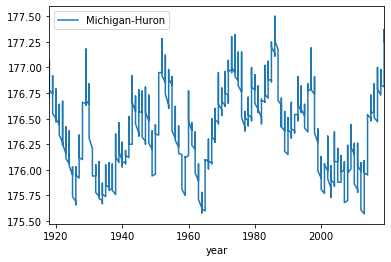

In [5]:
glwl_cleaned.plot(kind='line',x='year',y='Michigan-Huron')

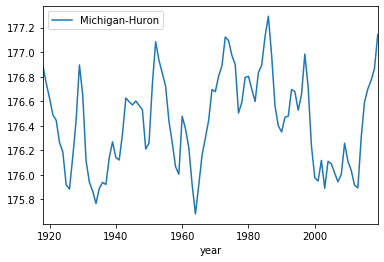

In [14]:
#What I want to do next is take the yearly average. This will be fairly simple as I can use groupby
glwl_yearly = glwl_cleaned.groupby('year')['Superior','Michigan-Huron','St_Clair','Erie','Ontario'].mean()
glwl_yearly = glwl_yearly.reset_index()
#glwl_yearly.plot(kind='line',x='year',y='Michigan-Huron')

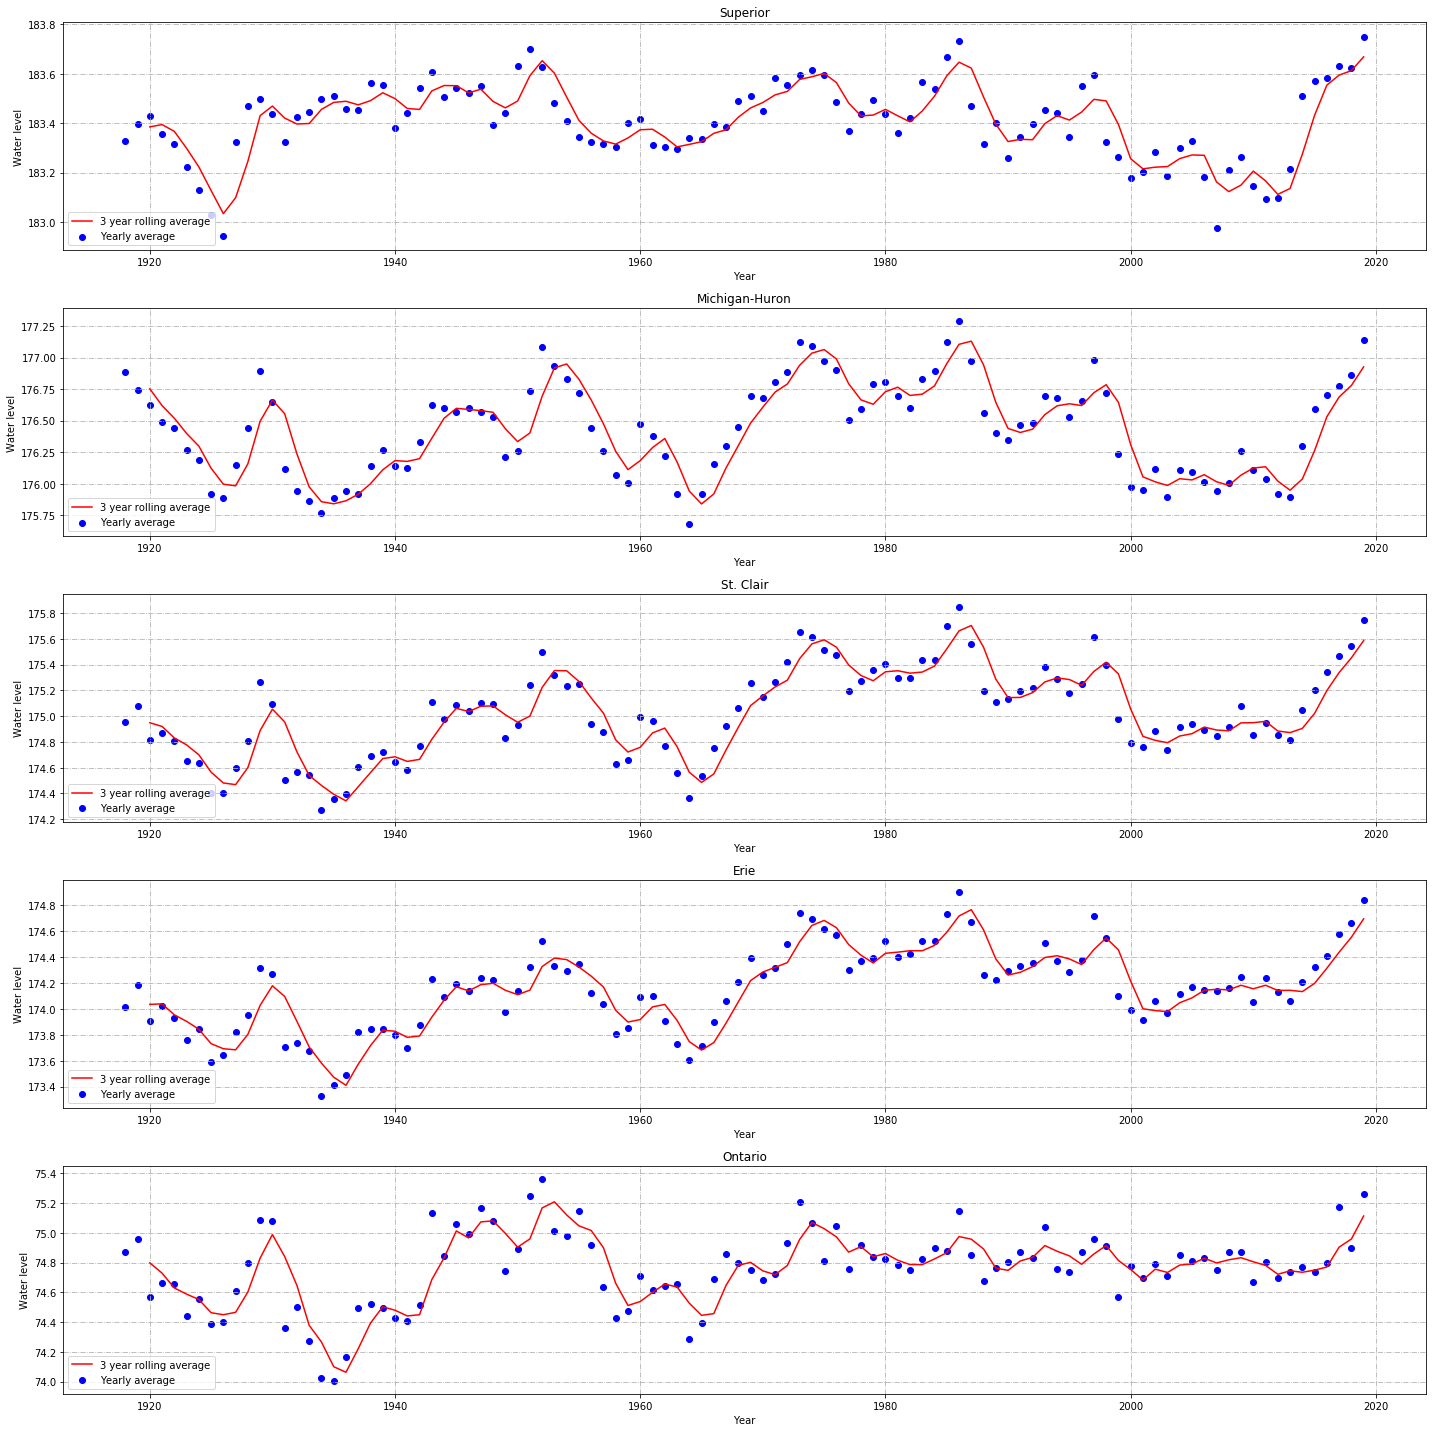

In [30]:
year_var = glwl_yearly['year']
su_var = glwl_yearly['Superior']
mh_var = glwl_yearly['Michigan-Huron']
sc_var = glwl_yearly['St_Clair']
er_var = glwl_yearly['Erie']
ot_var = glwl_yearly['Ontario']

su_rolling_3 = glwl_yearly['Superior'].rolling(window=3).mean()
mh_rolling_3 = glwl_yearly['Michigan-Huron'].rolling(window=3).mean()
sc_rolling_3 = glwl_yearly['St_Clair'].rolling(window=3).mean()
er_rolling_3 = glwl_yearly['Erie'].rolling(window=3).mean()
ot_rolling_3 = glwl_yearly['Ontario'].rolling(window=3).mean()


fig_lakelevels, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5,1,figsize=(20,20))

ax1.scatter(year_var,su_var,c='b',label='Yearly average')
ax1.plot(year_var,su_rolling_3,c='r', label="3 year rolling average")
ax1.legend(loc='lower left')
ax1.set(xlabel='Year',ylabel='Water level',title='Superior')
ax1.grid(linestyle = '-.')

ax2.scatter(year_var,mh_var,c='b',label='Yearly average')
ax2.plot(year_var,mh_rolling_3,c='r', label="3 year rolling average")
ax2.legend(loc='lower left')
ax2.set(xlabel='Year',ylabel='Water level',title='Michigan-Huron')
ax2.grid(linestyle = '-.')

ax3.scatter(year_var,sc_var,c='b',label='Yearly average')
ax3.plot(year_var,sc_rolling_3,c='r', label="3 year rolling average")
ax3.legend(loc='lower left')
ax3.set(xlabel='Year',ylabel='Water level',title='St. Clair')
ax3.grid(linestyle = '-.')

ax4.scatter(year_var,er_var,c='b',label='Yearly average')
ax4.plot(year_var,er_rolling_3,c='r', label="3 year rolling average")
ax4.legend(loc='lower left')
ax4.set(xlabel='Year',ylabel='Water level',title='Erie')
ax4.grid(linestyle = '-.')

ax5.scatter(year_var,ot_var,c='b',label='Yearly average')
ax5.plot(year_var,ot_rolling_3,c='r', label="3 year rolling average")
ax5.legend(loc='lower left')
ax5.set(xlabel='Year',ylabel='Water level',title='Ontario')
ax5.grid(linestyle = '-.')

fig_lakelevels.tight_layout()